# Part II - Pisa Dataset
## by Chayma Miledi


## Investigation Overview


My main goal is to investigate the impact on the students' scores. I am interested in three different dimension:

* Environment of the students: How does the country impact on the overall students score? How much do schools have group work?
* Gender of the students: How does gender impact the different scores?
* Parental background of the students: Do orphan students perform worse? How parents' education level affect student success?
* Type of the students: Is school harder for immigrant students? What is the impact of playing video games on stundets' grade? 

## Dataset Overview

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. 

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa_clean.csv')

## Scores distribution across students


In [13]:
def histogram (x, score):
    bins = np.arange(0, 1000 + 1, 100)
    plt.hist(x = x, bins = bins, ec = 'black', alpha = 0.85)
    plt.xlabel("{} Score".format(score))
    plt.ylabel("Number of Students")
    plt.title("{} Score distribution across students".format(score));

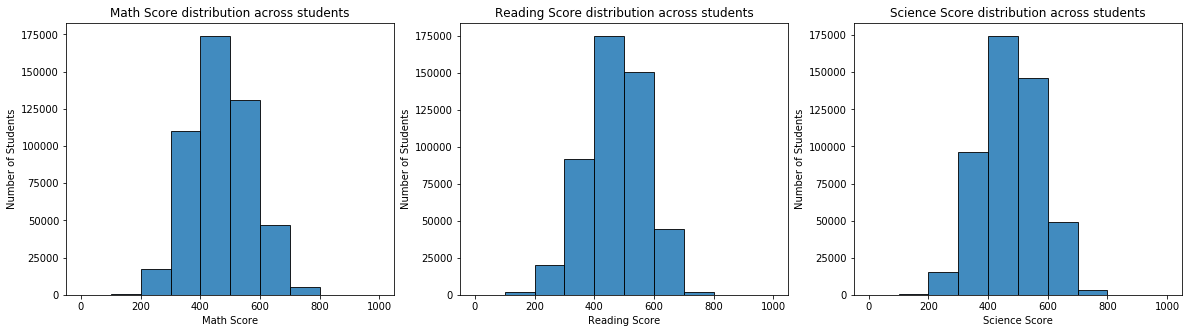

In [14]:
# univariate plots of math, reading, and science scores
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1 
histogram (df.math_score.values, 'Math')

plt.subplot(1, 3, 2) # 1 row, 3 cols, subplot 1 
histogram (df.reading_score.values, 'Reading')

plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 1 
histogram (df.science_score.values, 'Science')

The performance distribution of Math Score, Reading Score and Science Score is normal. Therefore we can conclude that the PISA test has been conducted in a proper manner. Most students scored between 400 and 500 points.

## How does the number of parents effect the student's score?

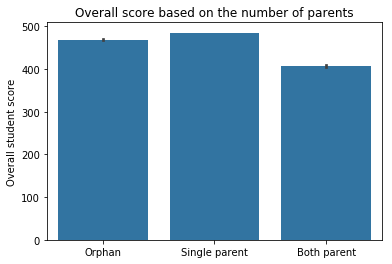

In [15]:
parent_number_group = df.groupby('parent_numbers').mean()
sb.barplot(data=df, x="parent_numbers", y="overall_score", color=sb.color_palette()[0])
plt.xticks([0, 1, 2], ['Orphan', 'Single parent', 'Both parent'])
plt.xlabel('')
plt.ylabel('Overall student score')
plt.title('Overall score based on the number of parents');

If the student has a single parent then the performance of the student is notably decreased. Students have a higher score if they live without or with both parents.

## Scores Correlation



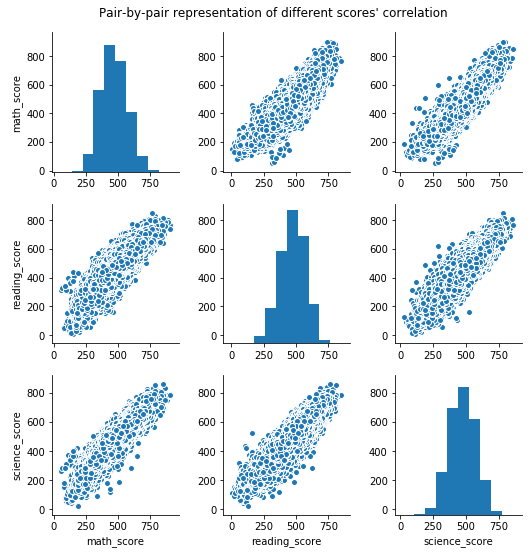

In [16]:
grid = sb.pairplot(data = df, vars=["math_score", "reading_score", "science_score"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

There is a relationship between all the performance categories, which makes us think that a student that is performing well in one category will also perform well in another category. They are therefore interdependent.

## The difference in scores between male and female students

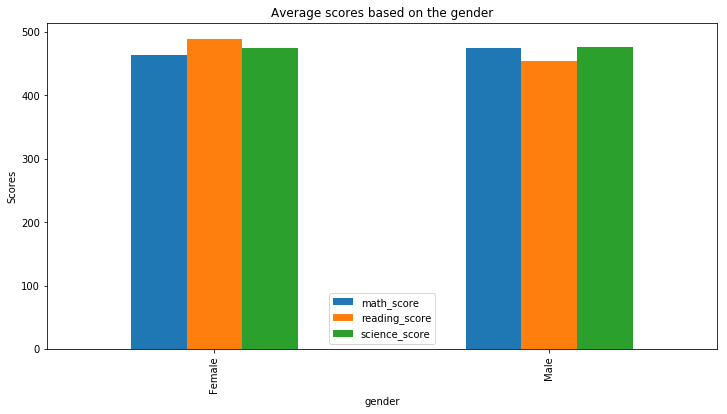

In [17]:
res = df.groupby(['gender']).mean()[['math_score', 'reading_score', 'science_score']]
ax = res.plot.bar(figsize=(12,6));
plt.ylabel('Scores')
plt.title('Average scores based on the gender');

In general, boys score higher than girls in math whilst girls are prominent in reading. They have similiar score in science.

## Conclusion

The student performance in the investigated data set seems to be influenced by location, gender and family background. As we discovered a relationship between Math, Reading and Science scores, such as a sample difference of students with a heterogeneous and a homogeneous family background, the results would need further investigation though.

In [18]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --template output-toggle.tpl

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 332357 bytes to Part_II_slide_deck.slides.html
